In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
plt.rcParams["figure.figsize"] = (10, 10)



In [11]:
def show(img):
    if img.ndim == 2:
        plt.gray()
    plt.imshow(img)
    plt.show()

def show_grid(imgs, titles=None, cols=1):
    num_imgs = len(imgs)
    
    if titles is None:
        titles = [f"Image {i}" for i in range(num_imgs)]
        
    fig = plt.figure(figsize=(30, 30))
    
    for i, (img, title) in enumerate(zip(imgs, titles)):
        a = fig.add_subplot(cols, num_imgs // cols, i+1)
        if img.ndim == 2:
            plt.gray()
        plt.imshow(img)
        a.set_title(title)
    plt.show()

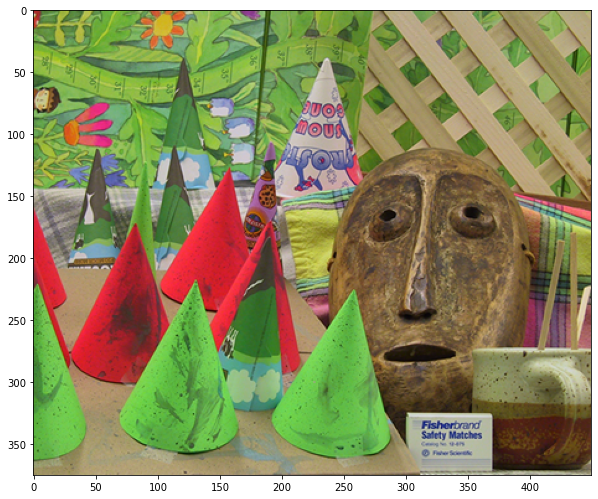

(375, 450, 3)


In [13]:
image = cv2.imread("im2.png")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
show(image)
print(image.shape)

In [14]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
print(pixel_values.shape) #375*450

(168750, 3)


In [15]:
kmeans = KMeans(n_clusters=4)

In [22]:
predicted_labels = kmeans.fit_predict(pixel_values)
print(predicted_labels.shape)

(168750,)


In [23]:
# attributes
# centers
predicted_centers = kmeans.cluster_centers_
print("Predicted Centers: ", predicted_centers.shape)

# inertia: sum of squared distances
inertia = kmeans.inertia_
print("Inertia: ", inertia)

Predicted Centers:  (4, 3)
Inertia:  310929504.0


In [21]:
predicted_centers = np.uint8(predicted_centers)
predicted_labels = predicted_labels.flatten()
print(predicted_labels.shape)

(168750,)


In [19]:
remake_image = predicted_centers[predicted_labels.flatten()]

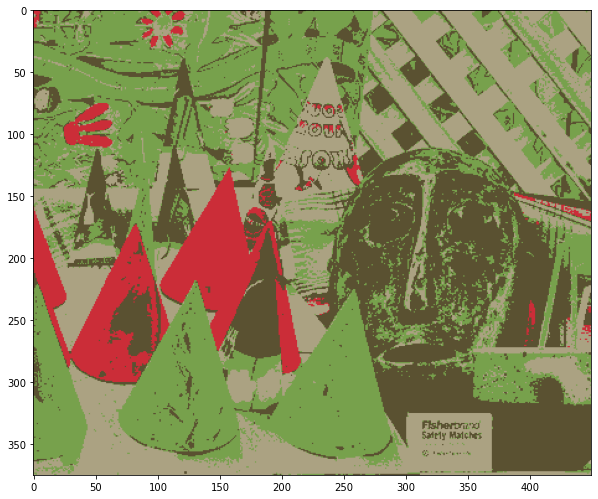

In [24]:
# reshape back to the original image dimension
remake_image = remake_image.reshape(image.shape)
# show the image
plt.imshow(remake_image)
plt.show()